In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
import cv2
import glob
import numpy as np


/mnt/870cc35c-9667-4587-917b-ab53a7d94aa3/Python Project/Dog vs Cat
['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg', 'cat.10005.jpg', 'cat.10006.jpg', 'cat.10007.jpg', 'cat.10008.jpg', 'cat.10009.jpg', 'cat.1001.jpg', 'cat.10010.jpg', 'cat.10011.jpg', 'cat.10012.jpg', 'cat.10013.jpg', 'cat.10014.jpg', 'cat.10015.jpg', 'cat.10016.jpg', 'cat.10017.jpg', 'cat.10018.jpg', 'cat.10019.jpg', 'cat.1002.jpg', 'cat.10020.jpg', 'cat.10021.jpg', 'cat.10022.jpg', 'cat.10023.jpg', 'cat.10024.jpg', 'cat.10025.jpg', 'cat.10026.jpg', 'cat.10027.jpg', 'cat.10028.jpg', 'cat.10029.jpg', 'cat.1003.jpg', 'cat.10030.jpg', 'cat.10031.jpg', 'cat.10032.jpg', 'cat.10033.jpg', 'cat.10034.jpg', 'cat.10035.jpg', 'cat.10036.jpg', 'cat.10037.jpg', 'cat.10038.jpg', 'cat.10039.jpg', 'cat.1004.jpg', 'cat.10040.jpg', 'cat.10041.jpg', 'cat.10042.jpg', 'cat.10043.jpg', 'cat.10044.jpg', 'cat.10045.jpg', 'cat.10046.jpg

In [ ]:
print(os.getcwd())  # shows current working directory
print(os.listdir('dogs-vs-cats/train'))  # shows files present

In [2]:
import os

path, _, files = next(os.walk('dogs-vs-cats/train'))
file_count = len(files)
print("Number of images:", file_count)


Number of images: 25000


In [3]:
import numpy as np 
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
from sklearn.model_selection import train_test_split
import cv2 as cv

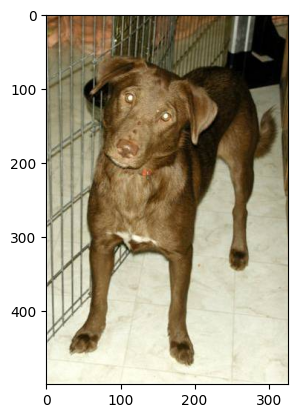

In [4]:
img = mpimg.imread('dogs-vs-cats/train/dog.1.jpg')
imgplt = plt.imshow(img)
plt.show()

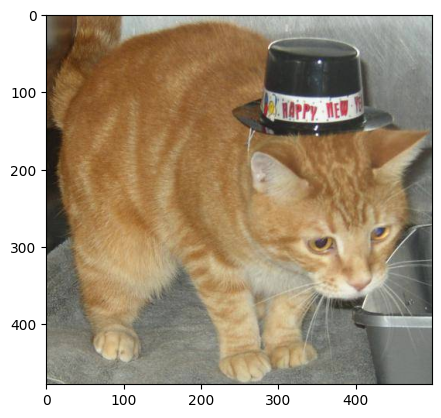

In [5]:
img = mpimg.imread('dogs-vs-cats/train/cat.4121.jpg')
imgplt = plt.imshow(img)
plt.show()

In [6]:
file_names = os.listdir('dogs-vs-cats/train')
for i in range(5):
    name = file_names[i]
    print(name[:3])

cat
cat
cat
cat
cat


In [7]:
file_names = os.listdir('dogs-vs-cats/train')

dog_count = 0
cat_count = 0

for img_file in file_names:
    
    name = img_file[0:3]
    
    if name == 'dog':
        dog_count += 1
    else:
        cat_count +=1
        
print(dog_count)
print(cat_count)

12500
12500


In [8]:
original_folder = 'dogs-vs-cats/train'
resized_folder= 'dogs-vs-cats/image_resized'

2025-09-28 10:29:05.680820: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-28 10:29:05.977199: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-28 10:29:07.388765: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [10]:
# original_folder = 'dogs-vs-cats/train/'
# resized_folder = 'dogs-vs-cats/image_resized/'

# for i in range(25000):

#   filename = os.listdir(original_folder)[i]
#   img_path = original_folder+filename

#   img = Image.open(img_path)
#   img = img.resize((224, 224))
#   img = img.convert('RGB')

#   newImgPath = resized_folder+filename
#   img.save(newImgPath)

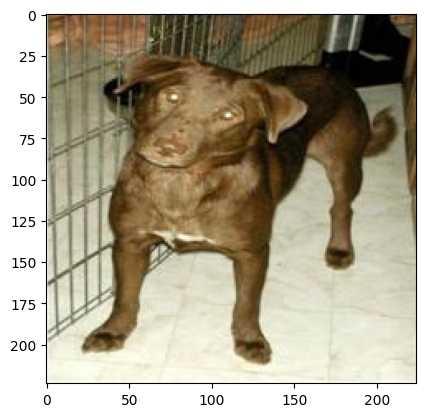

In [14]:
img = mpimg.imread('dogs-vs-cats/image_resized/dog/dog.1.jpg')
imgplt = plt.imshow(img)
plt.show()

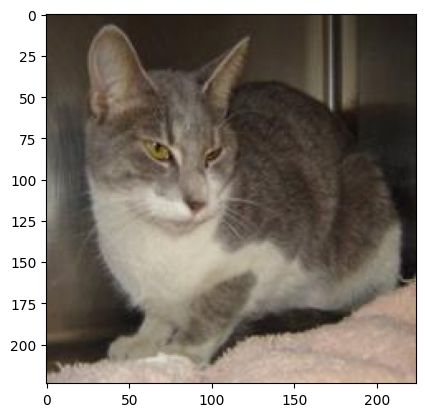

In [15]:
img = mpimg.imread('dogs-vs-cats/image_resized/cat/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [19]:
all_images = []
image_directory = 'dogs-vs-cats/image_resized/'
for folder in ['cat', 'dog']:
    folder_path = os.path.join(image_directory, folder)
    images = [os.path.join(folder_path, img) for img in os.listdir(folder_path) if img.endswith(('.jpg', '.png'))]
    all_images.extend(images)
labels = []
for img_path in all_images:
    # Get the base name of the file
    filename = os.path.basename(img_path)
    if filename.startswith('dog'):
        labels.append('1')  # string '1'
    else:
        labels.append('0')  # string '0'

df = pd.DataFrame({'filename': all_images, 'label': labels})

In [24]:

print(file_names[0:5])
print(len(file_names))

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg']
25000


In [22]:
print(labels[0:5])
print(len(labels))

['0', '0', '0', '0', '0']
25000


In [25]:
values, counts = np.unique(labels,return_counts=True)
print(values)
print(counts)

['0' '1']
[12500 12500]


In [ ]:
# Get the list of cat and dog images
cat_files = glob.glob(image_directory + 'cat/*.jpg') + glob.glob(image_directory + 'cat/*.png')
dog_files = glob.glob(image_directory + 'dog/*.jpg') + glob.glob(image_directory + 'dog/*.png')

In [33]:
# Split into train/test (assuming you have 25000 images)
train_df_full, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df_full, test_size=0.2, random_state=42)

In [34]:
df.head()

,filename,label
0,dogs-vs-cats/image_resized/cat/cat.0.jpg,0
1,dogs-vs-cats/image_resized/cat/cat.1.jpg,0
2,dogs-vs-cats/image_resized/cat/cat.10.jpg,0
3,dogs-vs-cats/image_resized/cat/cat.100.jpg,0
4,dogs-vs-cats/image_resized/cat/cat.1000.jpg,0


In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 16000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.
Found 4000 validated image filenames belonging to 2 classes.


# Model Creation

In [37]:
%pip install tensorflow_hub

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 4.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [38]:
import tensorflow_hub as hub
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pre_trained_model = hub.KerasLayer(mobilenet_model,
                       input_shape=(224,224,3),
                       trainable = False
                       )
num_of_classes = 2
model = tf.keras.Sequential([
    pre_trained_model,
    tf.keras.layers.Dense(num_of_classes)
])

E0000 00:00:1759036856.266639   23960 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1759036856.273819   23960 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x7f59ecd72cf0> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)